# Breast Cancer Prediction - Structured Notebook

## Data Preprocessing

In [2]:
import pandas as pd
data=pd.read_csv('data.csv')
data=data.drop(columns=['Unnamed: 32','id','texture_se','symmetry_se','smoothness_se','fractal_dimension_se','fractal_dimension_mean'])
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})
data['diagnosis']=data['diagnosis'].astype(bool)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = data.drop(columns=['diagnosis']) 
y = data['diagnosis']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lda = LinearDiscriminantAnalysis(n_components=1) 
X_lda = lda.fit_transform(X_scaled, y)
# from sklearn.decomposition import PCA

# # Perform PCA for feature extraction
# pca = PCA(n_components=5)
# X_pca = pca.fit_transform(X)

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# lda = LinearDiscriminantAnalysis(n_components=1) 
# X_lda = lda.fit_transform(X_scaled, y)

Accuracy: 98.2456

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99        71
        True       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



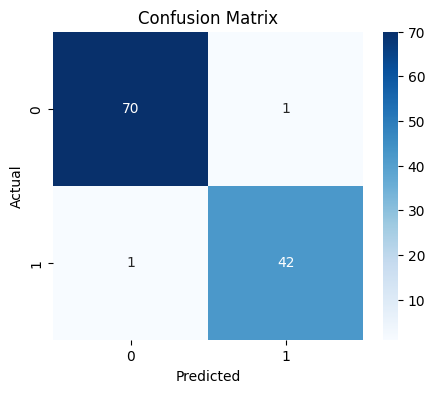

In [4]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)
model = XGBClassifier(eval_metric='logloss', random_state=17)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.4f}")

class_report = classification_report(y_test, y_pred) 
print("\nClassification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Stacking model


Stacking Model Accuracy: 0.9737

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.97      0.98        71
        True       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



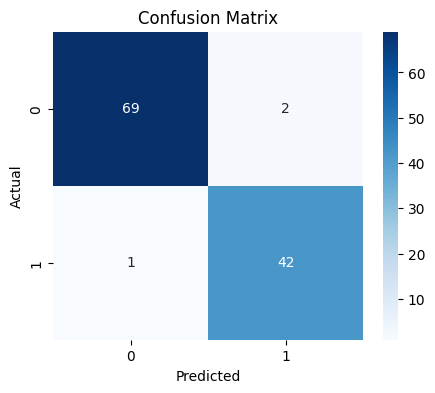

In [5]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


base_learners = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ('svc', SVC(probability=True))
]
stack = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
print(f"Stacking Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
class_report = classification_report(y_test, y_pred) 
print("\nClassification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Decision Tree

Accuracy: 96.4912


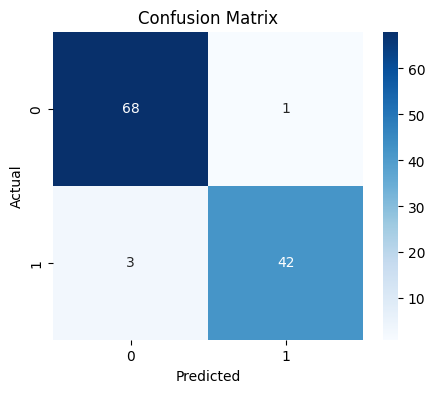

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

accu_dec=accuracy_score(y_pred,y_test)
conf_mat=confusion_matrix(y_pred,y_test)
print(f"Accuracy: {accu_dec*100:.4f}")

plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Random Forest

Random forest Accuracy: 0.9737

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.97      0.98        71
        True       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



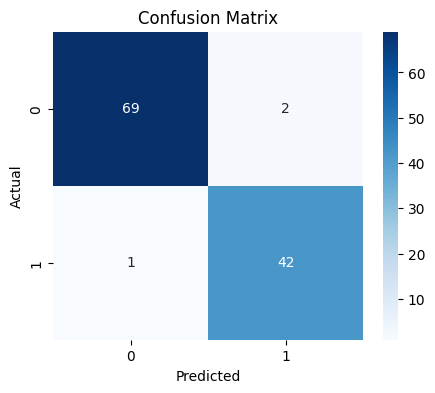

In [7]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

     
stack = RandomForestClassifier(n_estimators=50, random_state=42)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
print(f"Random forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
class_report = classification_report(y_test, y_pred) 
print("\nClassification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Support Vector Machine (SVM)

SVM Accuracy: 0.9825

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.97      0.98        71
        True       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



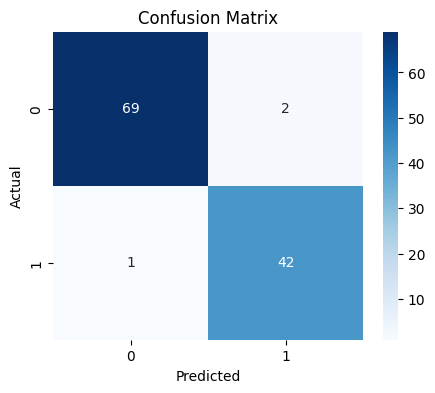

In [8]:

from sklearn.svm import SVC

# Initialize and train SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

class_report = classification_report(y_test, y_pred) 
print("\nClassification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Feature Engineering

### Principal Component Analysis (PCA)

In [9]:

from sklearn.decomposition import PCA

# Perform PCA for feature extraction
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Save PCA features
import pandas as pd
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
pca_df.to_csv('BreastCancer_PCA_Features.csv', index=False)
print("PCA-transformed features saved.")


PCA-transformed features saved.


### Feature Selection

In [10]:

from sklearn.feature_selection import SelectKBest, f_classif

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Save selected features
selected_features_df = pd.DataFrame(X_selected, columns=[f"Feature{i+1}" for i in range(X_selected.shape[1])])
selected_features_df.to_csv('BreastCancer_Selected_Features.csv', index=False)
print("Selected features saved.")


Selected features saved.


## Algorithm Comparison Table

In [11]:

import pandas as pd

# Creating a comparison table
data = {
    'Algorithm': ['XGB', 'Logistic', 'Decesion', 'SVM'],
    'Accuracy': [accuracy, accu_dec, accuracy, accuracy_svm]
}

comparison_df = pd.DataFrame(data)
print(comparison_df)

# Save the table to a CSV file
comparison_df.to_csv('BreastCancer_Algorithm_Comparison.csv', index=False)


  Algorithm  Accuracy
0       XGB  0.982456
1  Logistic  0.964912
2  Decesion  0.982456
3       SVM  0.982456


Accuracy: 0.9883040935672515
Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       108
        True       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



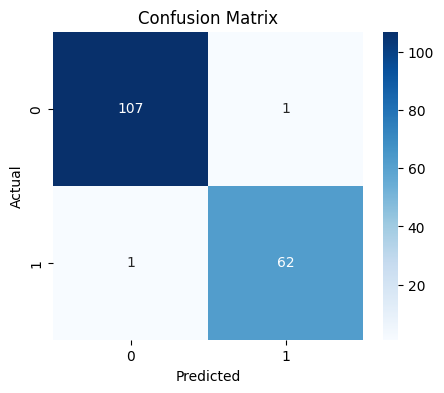

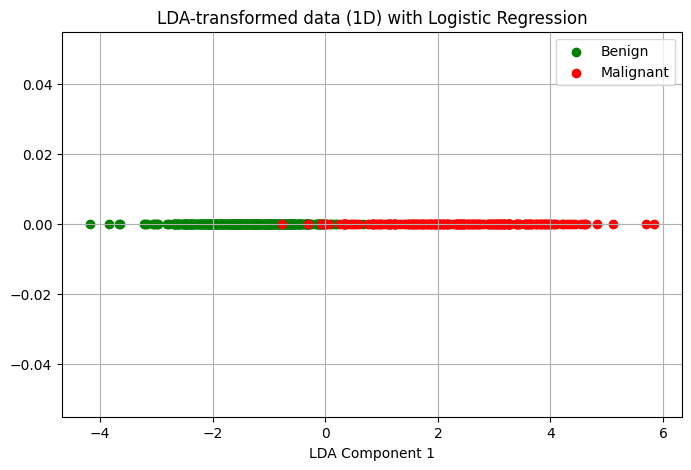

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()